# Imports

In [81]:
from google.colab import drive
import pandas as pd
import numpy as np
import gzip
import plotly.express as px
import matplotlib.pyplot as plt

In [82]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Experiments description

In [83]:
description = pd.read_csv("/content/drive/My Drive/Data/experiment-description_2022-04-05.csv")
description

,Site,Cell_Line,Mutation,Biosensors,Conditions,Acquisition_frequency_min,Duration_h
0,1,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
1,2,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
2,3,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
3,4,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
4,5,MCF10A,AKT1_E17K,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
5,6,MCF10A,AKT1_E17K,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
6,7,MCF10A,AKT1_E17K,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
7,8,MCF10A,AKT1_E17K,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
8,9,MCF10A,PIK3CA_E545K,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
9,10,MCF10A,PIK3CA_E545K,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24


*   Altogether 28 experiments were conducted
*   Each of them took 24 hours
*   Acquisitions taken every 5 minuts
*   Amounts to 289 frames in total


# Data Exploration

## Data reading

In [84]:
path = "/content/drive/My Drive/Data/objNuclei_1line_clean_tracks.csv.gz" # @param {type:"string"}


def unpack_and_read(f_p):
  with gzip.open(f_p, 'rt') as f:
    df = pd.read_csv(f)
  return df

df = unpack_and_read(path)

## Columns description

In [85]:
df.head()

,Image_Metadata_Site,Image_Metadata_T,track_id,objNuclei_Intensity_IntegratedIntensity_imFOX,objNuclei_Intensity_IntegratedIntensity_imKTR,objNuclei_Intensity_MeanIntensity_imFOX,objNuclei_Intensity_MeanIntensity_imKTR,objNuclei_Location_Center_X,objNuclei_Location_Center_Y,objCytoRing_Intensity_IntegratedIntensity_imFOX,objCytoRing_Intensity_IntegratedIntensity_imKTR,objCytoRing_Intensity_MeanIntensity_imFOX,objCytoRing_Intensity_MeanIntensity_imKTR,objCells_Intensity_IntegratedIntensity_imFOX,objCells_Intensity_IntegratedIntensity_imKTR,objCells_Intensity_MeanIntensity_imFOX,objCells_Intensity_MeanIntensity_imKTR
0,1,0,1,7.85992,159.461,0.015057,0.305481,93.1188,361.218,6.53053,64.4278,0.022754,0.224487,16.7638,251.421,0.018162,0.272396
1,1,1,1,7.83301,145.054,0.014892,0.275768,92.1312,361.797,6.54171,65.4250,0.023116,0.231184,16.7676,238.394,0.018147,0.258002
2,1,2,1,7.54832,118.594,0.014977,0.235305,90.7421,362.552,6.45701,67.6803,0.022577,0.236645,16.3182,213.525,0.018031,0.235939
3,1,3,1,7.14376,100.844,0.014852,0.209656,90.3285,362.004,6.33561,66.3947,0.022955,0.240560,15.9457,195.569,0.018141,0.222490
4,1,4,1,7.46052,101.378,0.015072,0.204804,90.0727,361.735,6.41532,66.2002,0.023160,0.238990,16.2927,194.476,0.018368,0.219251


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9457334 entries, 0 to 9457333
Data columns (total 17 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   Image_Metadata_Site                              int64  
 1   Image_Metadata_T                                 int64  
 2   track_id                                         int64  
 3   objNuclei_Intensity_IntegratedIntensity_imFOX    float64
 4   objNuclei_Intensity_IntegratedIntensity_imKTR    float64
 5   objNuclei_Intensity_MeanIntensity_imFOX          float64
 6   objNuclei_Intensity_MeanIntensity_imKTR          float64
 7   objNuclei_Location_Center_X                      float64
 8   objNuclei_Location_Center_Y                      float64
 9   objCytoRing_Intensity_IntegratedIntensity_imFOX  float64
 10  objCytoRing_Intensity_IntegratedIntensity_imKTR  float64
 11  objCytoRing_Intensity_MeanIntensity_imFOX        float64
 12  objCytoRing_In

**Image_Metadata_Site** - no of experiment (int64)

**Image_Metadata_T** - no of frame for each cell tracked (int64)

**track_id** - no of cell tracked (int64)

**objNuclei_Location_Center_X** - location of a cell along X axis (float64) (what units?)

**objNuclei_Location_Center_Y** - location of a cell along Y axis (float64) (what units?)

**rest** - biological markers' values (float64)




## NaNs in data

In [87]:
df.isnull().sum()

,0
Image_Metadata_Site,0
Image_Metadata_T,0
track_id,0
objNuclei_Intensity_IntegratedIntensity_imFOX,18481
objNuclei_Intensity_IntegratedIntensity_imKTR,18481
objNuclei_Intensity_MeanIntensity_imFOX,18481
objNuclei_Intensity_MeanIntensity_imKTR,18481
objNuclei_Location_Center_X,18481
objNuclei_Location_Center_Y,18481
objCytoRing_Intensity_IntegratedIntensity_imFOX,18486


In [88]:
nan_rows = df[df['objNuclei_Location_Center_X'].isnull()]
nan_rows.head()

,Image_Metadata_Site,Image_Metadata_T,track_id,objNuclei_Intensity_IntegratedIntensity_imFOX,objNuclei_Intensity_IntegratedIntensity_imKTR,objNuclei_Intensity_MeanIntensity_imFOX,objNuclei_Intensity_MeanIntensity_imKTR,objNuclei_Location_Center_X,objNuclei_Location_Center_Y,objCytoRing_Intensity_IntegratedIntensity_imFOX,objCytoRing_Intensity_IntegratedIntensity_imKTR,objCytoRing_Intensity_MeanIntensity_imFOX,objCytoRing_Intensity_MeanIntensity_imKTR,objCells_Intensity_IntegratedIntensity_imFOX,objCells_Intensity_IntegratedIntensity_imKTR,objCells_Intensity_MeanIntensity_imFOX,objCells_Intensity_MeanIntensity_imKTR
239858,1,283,830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240397,1,261,832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241182,1,250,835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241468,1,247,836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241989,1,235,838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Some rows have no biological markers' values
* ≈ 0.2% of rows have missing values

## Number of frames

Are there 289 entries for each Site and track_id?

In [89]:
counts = df.groupby(['Image_Metadata_Site', 'track_id']).size()

counts.describe()

,0
count,47547.000000
mean,198.904957
std,113.335201
min,11.000000
25%,68.000000
50%,289.000000
75%,289.000000
max,289.000000


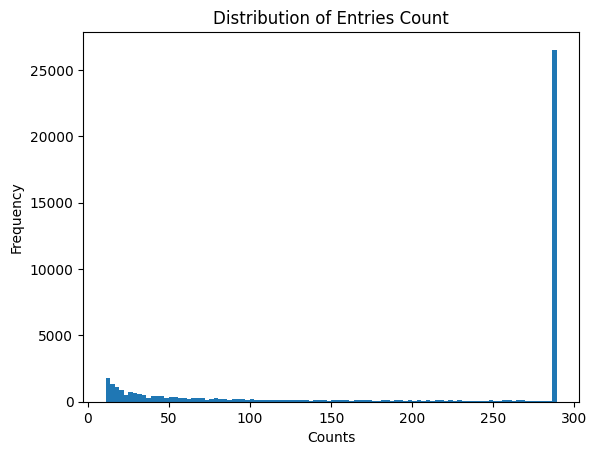

In [90]:
plt.hist(counts, bins=100)
plt.title("Distribution of Entries Count")
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.show()

In [91]:

percentage_289 = (counts[counts == 289].count() / counts.count()) * 100
print(f'{percentage_289:.2f}% of counts have the value 289')

55.64% of counts have the value 289


## Single cell simulation

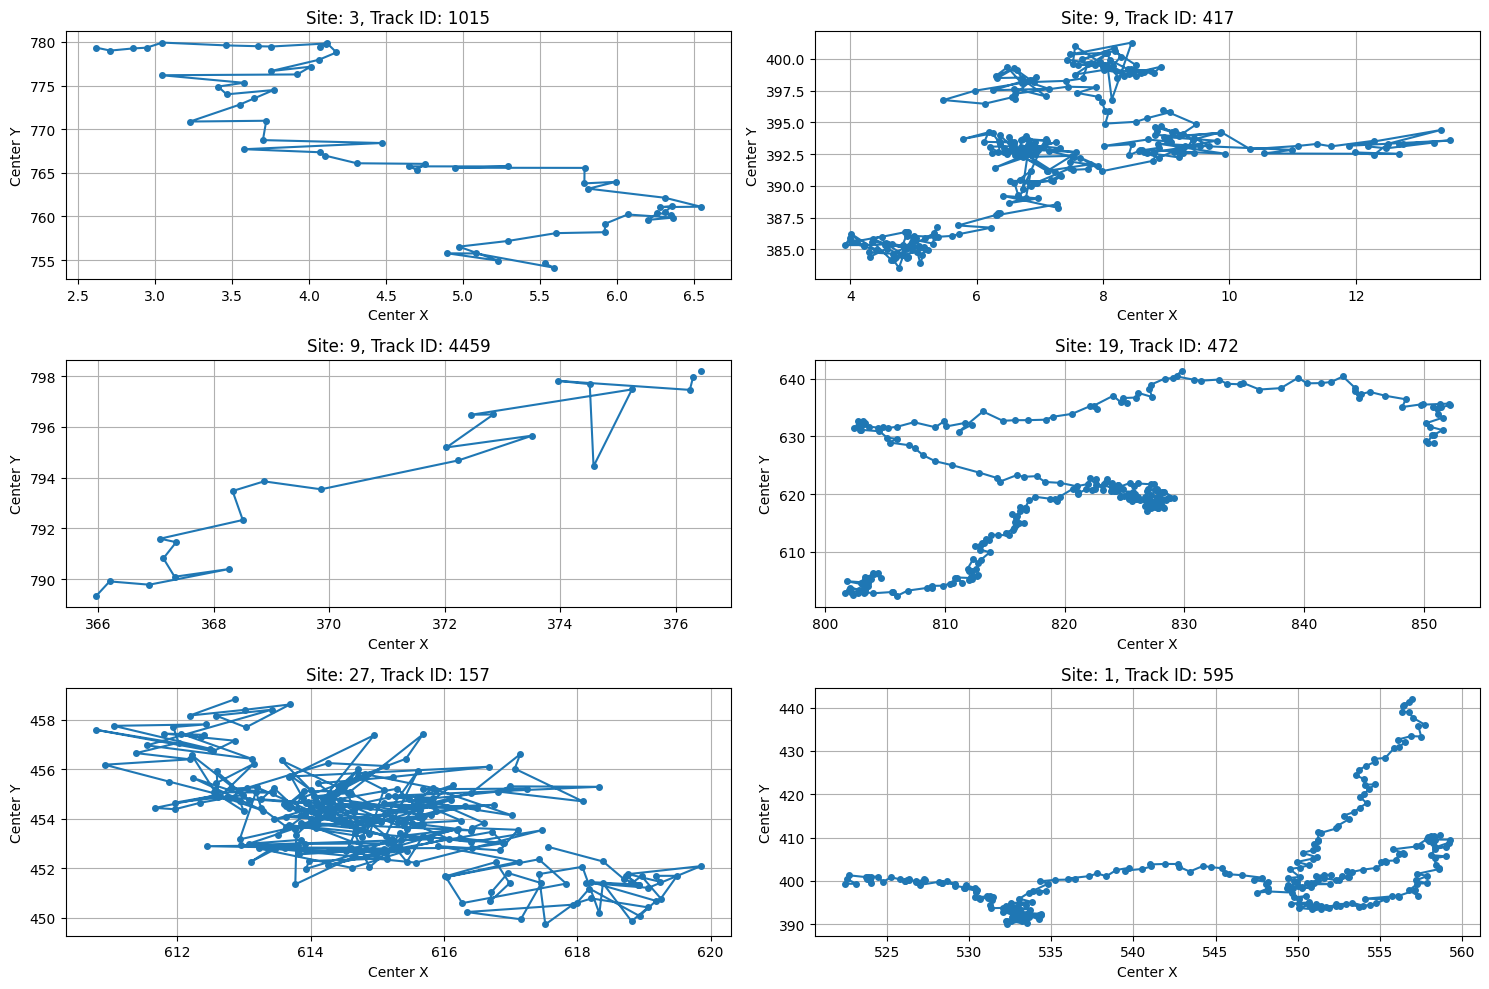

In [92]:
unique_pairs = df[['Image_Metadata_Site', 'track_id']].drop_duplicates()

sampled_pairs = unique_pairs.sample(n=6, random_state=2)

plt.figure(figsize=(15, 10))

for i, (site, track_id) in enumerate(zip(sampled_pairs['Image_Metadata_Site'], sampled_pairs['track_id']), start=1):
    example = df[(df['Image_Metadata_Site'] == site) & (df['track_id'] == track_id)]
    plt.subplot(3, 2, i)
    plt.plot(example['objNuclei_Location_Center_X'], example['objNuclei_Location_Center_Y'], 'o-', markersize=4)
    plt.xlabel('Center X')
    plt.ylabel('Center Y')
    plt.title(f'Site: {site}, Track ID: {track_id}')
    plt.grid(True)

plt.tight_layout()
plt.show()

* Subsequent locations are defnitely correlated
* Unpredictability frame to frame differs

## Markers comparison

Comparing stable and erratic tracks' markers from above simulation

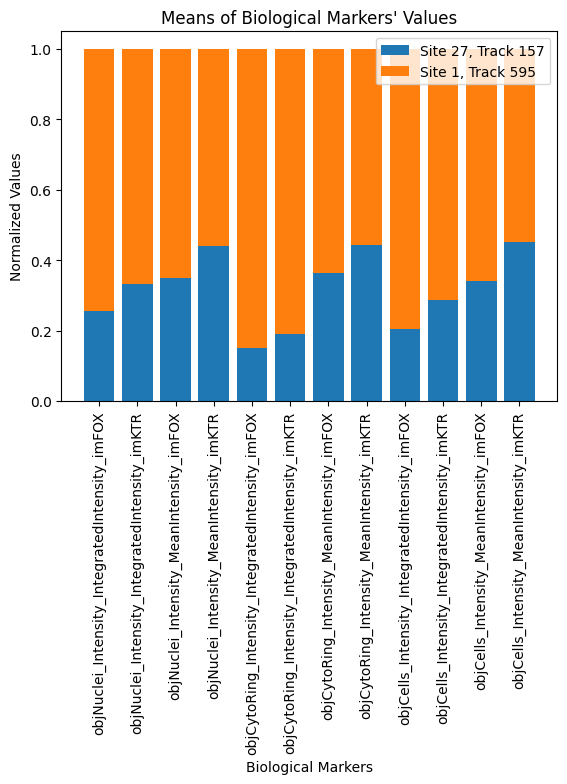

In [93]:


example1 = df[(df['Image_Metadata_Site'] == 27) & (df['track_id'] == 157)]
mean1 = example1.mean()

example2 = df[(df['Image_Metadata_Site'] == 1) & (df['track_id'] == 595)]
mean2 = example2.mean()

means_df = pd.DataFrame({
    'Site 27, Track 157': mean1,
    'Site 1, Track 595': mean2
})

means_df.drop(['Image_Metadata_Site', 'Image_Metadata_T', 'track_id',
               'objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y'], inplace=True)

sum_means = means_df.sum(axis=1)

means_df['Site 27, Track 157'] = means_df['Site 27, Track 157'] / sum_means
means_df['Site 1, Track 595'] = means_df['Site 1, Track 595'] / sum_means

plt.bar(means_df.index, means_df['Site 27, Track 157'], label='Site 27, Track 157')
plt.bar(means_df.index, means_df['Site 1, Track 595'], label='Site 1, Track 595', bottom=means_df['Site 27, Track 157'])
plt.title("Means of Biological Markers' Values")
plt.xlabel('Biological Markers')
plt.ylabel('Normalized Values')
plt.xticks(rotation=90)
plt.legend()
plt.show()


All the markers in the stable track are higher. Is it just a coincidence?

## Simulation of experiment

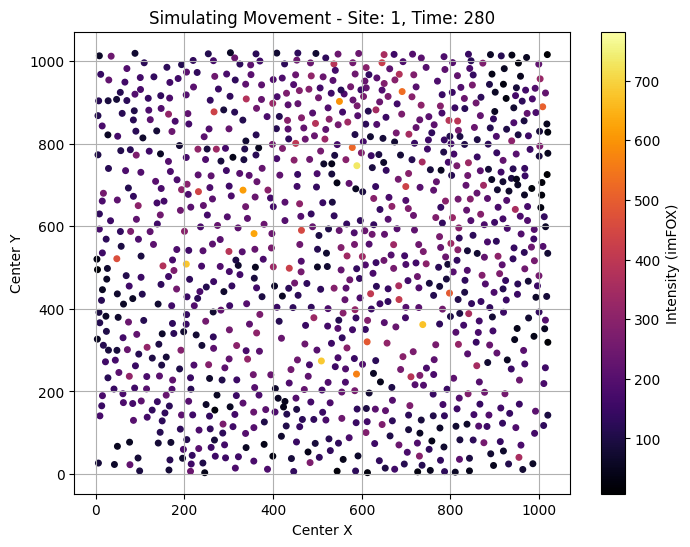

In [94]:
from IPython.display import clear_output
import time

site = 1

marker = 'objCells_Intensity_IntegratedIntensity_imKTR'
min_value = df[df['Image_Metadata_Site'] == site][marker].min()
max_value = df[df['Image_Metadata_Site'] == site][marker].max()

for t in range(289):
    if (t % 40) != 0:
        continue

    clear_output(wait=True)

    current_frame = df[df['Image_Metadata_Site'] == site & (df['Image_Metadata_T'] == t)]

    plt.figure(figsize=(8, 6))

    sc = plt.scatter(
        current_frame['objNuclei_Location_Center_X'],
        current_frame['objNuclei_Location_Center_Y'],
        s=16,
        c=current_frame[marker],
        cmap='inferno',
        vmin=min_value,
        vmax=max_value
    )

    plt.xlabel('Center X')
    plt.ylabel('Center Y')
    plt.title(f'Simulating Movement - Site: {site}, Time: {t}')
    plt.grid(True)

    plt.colorbar(sc, label='Intensity (imFOX)')

    plt.show()

    time.sleep(1)